In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
from hough import hough_lines_acc, hough_peaks, hough_lines_draw, find_circles, hough_circles_draw

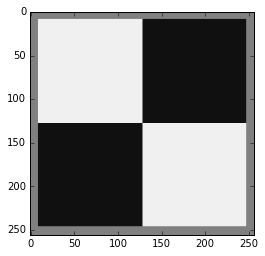

In [2]:
img = cv2.cvtColor(cv2.imread('input/ps1-input0.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)

True

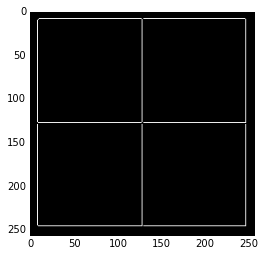

In [3]:
# Question 1.a
img_edges = cv2.Canny(img, 100, 200)
plt.imshow(img_edges, 'gray')
cv2.imwrite('output/ps1-1-a-1.png', img_edges)

True

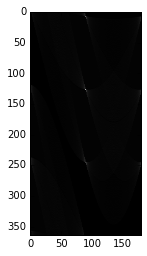

In [4]:
## 2.a
H, theta, rho = hough_lines_acc(img_edges)
Hnorm = H/(np.amax(H)) * 255  # Normalize
plt.imshow(Hnorm, 'gray')

cv2.imwrite('output/ps1-2-a-1.png', Hnorm)

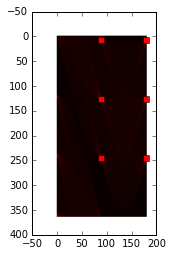

In [5]:
## 2.b
peaks = hough_peaks(H, 10, nhood_size=(51,51))
fig = plt.figure()
plt.imshow(Hnorm, 'hot')
plt.plot(peaks[:,1], peaks[:,0], 'rs')
fig.savefig('output/ps1-2-b-1.png')

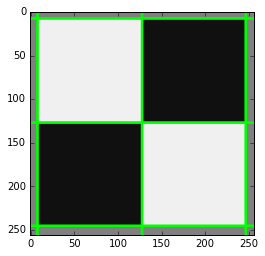

In [6]:
## 2.c
plt.imshow(hough_lines_draw(img, 'output/ps1-2-c-1.png', peaks, rho, theta))

True

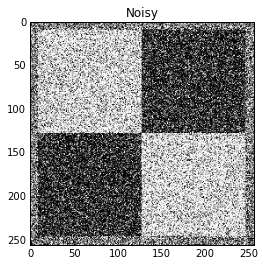

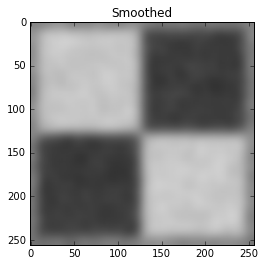

In [7]:
# Question 3.a
img_noisy = cv2.cvtColor(cv2.imread('input/ps1-input0-noise.png'), cv2.COLOR_BGR2RGB)
img_smoothed = cv2.GaussianBlur(img_noisy, (41,41), 0)
plt.figure()
plt.imshow(img_noisy)
plt.title('Noisy')
plt.figure()
plt.imshow(img_smoothed)
plt.title('Smoothed')
cv2.imwrite('output/ps1-3-a-1.png', img_smoothed)

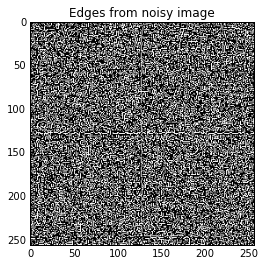

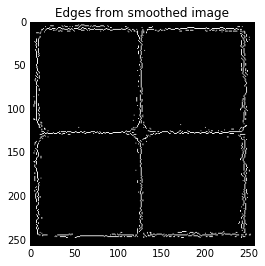

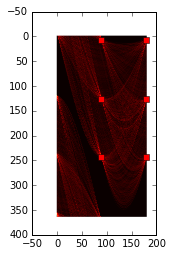

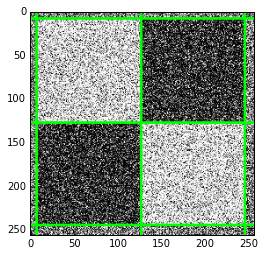

In [8]:
# Question 3.b
edges_noisy = cv2.Canny(img_noisy, 10, 50)
edges_smoothed = cv2.Canny(img_smoothed, 10, 32)
plt.figure()
plt.imshow(edges_noisy, 'gray')
plt.title('Edges from noisy image')
cv2.imwrite('output/ps1-3-b-1.png', edges_noisy)
plt.figure()
plt.imshow(edges_smoothed, 'gray')
plt.title('Edges from smoothed image')
cv2.imwrite('output/ps1-3-b-2.png', edges_smoothed)

# Question 3.c
H, theta, rho = hough_lines_acc(edges_smoothed)
Hnorm = H/(np.amax(H)) * 255  # Normalize
peaks = hough_peaks(H, 6, nhood_size=(21,21))

fig = plt.figure()
plt.imshow(Hnorm, 'hot')
plt.plot(peaks[:,1], peaks[:,0], 'rs')
fig.savefig('output/ps1-3-c-1.png')

plt.figure()
img_lines = hough_lines_draw(img_noisy, 'output/ps1-3-c-2.png', peaks, rho, theta)
plt.imshow(img_lines)

True

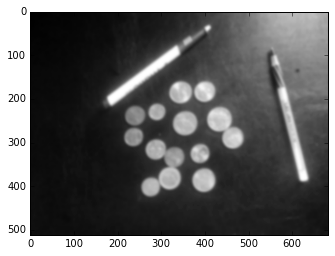

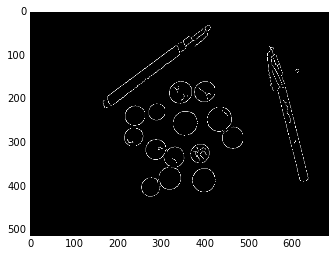

In [16]:
# Question 4.a
img1_gray = cv2.imread('input/ps1-input1.png', 0)
# img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1_smooth = cv2.GaussianBlur(img1_gray, (15, 15), 0)
cv2.imwrite('output/ps1-4-a-1.png', img1_smooth)
plt.imshow(img1_smooth, 'gray')

# Question 4.b
plt.figure()
img1_edge = cv2.Canny(img1_smooth, 10, 50)
plt.imshow(img1_edge, 'gray')
cv2.imwrite('output/ps1-4-b-1.png', img1_edge)

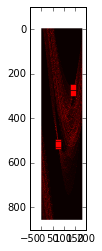

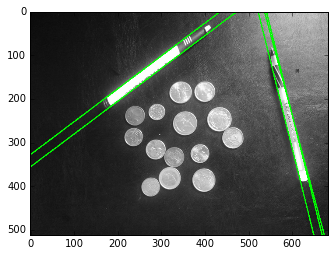

In [10]:
# Question 4.c
H, theta, rho = hough_lines_acc(img1_edge)
Hnorm = H/(np.amax(H)) * 255  # Normalize
peaks = hough_peaks(H, 10, nhood_size=(11,11))
fig = plt.figure()
plt.imshow(Hnorm, 'hot')
plt.plot(peaks[:,1], peaks[:,0], 'rs')
fig.savefig('output/ps1-4-c-1.png')

plt.figure()
img1_lines = hough_lines_draw(img1_gray, 'output/ps1-4-c-2.png', peaks, rho, theta)
plt.imshow(img1_lines)

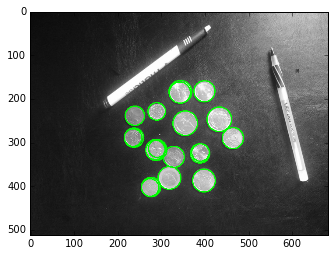

In [11]:
## 5.a
cv2.imwrite('output/ps1-5-a-1.png', img1_smooth)
cv2.imwrite('output/ps1-5-a-2.png', img1_edge)
centers, radii = find_circles(img1_edge, [20, 22, 24, 26, 28])
img1_circ = hough_circles_draw(img1_gray, centers, radii)
cv2.imwrite('output/ps1-5-b-1.png', img1_circ)
plt.imshow(img1_circ)

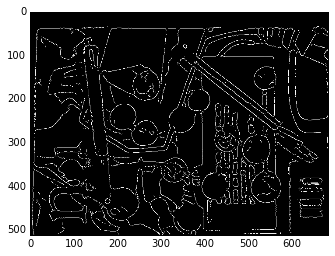

In [17]:
# Question 6.a
img2_gray = cv2.imread('input/ps1-input2.png', 0)
img2_smooth = img2_gray
img2_smooth = cv2.GaussianBlur(img2_smooth, (21, 21), 0)

img2_edge = cv2.Canny(img2_smooth, 10, 30)
plt.imshow(img2_edge, 'gray')

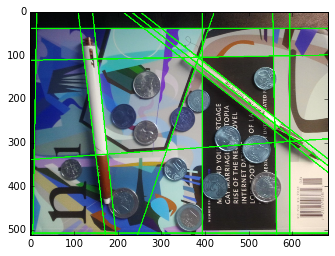

In [18]:
H2, theta2, rho2 = hough_lines_acc(img2_edge)
peaks2 = hough_peaks(H2, 15, nhood_size = (21,21), threshold = 0.30*np.amax(H))
img2_lines = hough_lines_draw(img2, 'output/ps1-6-a-1.png', peaks2, rho2, theta2)
plt.imshow(img2_lines)

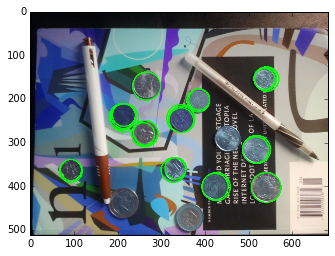

In [14]:
# Question 7.a
centers, radii = find_circles(img2_edge, [24, 26, 28, 30, 32, 34])
img2_circ = hough_circles_draw(img2, centers, radii)
cv2.imwrite('output/ps1-7-a-1.png', img2_circ)
plt.imshow(img2_circ)